In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",None)

# Loading Train Dataset

In [63]:
df_train=pd.read_csv("train-housing.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [64]:
#Shape of the data
df_train.shape

(1168, 81)

In [65]:
#Information required of the datasets:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

<AxesSubplot:>

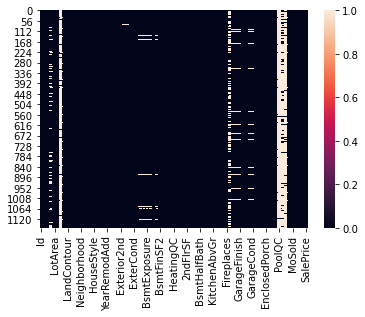

In [66]:
sns.heatmap(df_train.isnull())

The above graph is here to show that if there are any null values in the above dataset.
We can observe that there are many null values in present in the train dataset.

In [67]:
#checking the columns having null values
nan_cols=[i for i in df_train.columns if df_train[i].isnull().any()]
df_train[nan_cols].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

In [68]:
# Percentage of null values in each columns having NAN
print((df_train[nan_cols].isnull().mean())*100)

LotFrontage     18.321918
Alley           93.407534
MasVnrType       0.599315
MasVnrArea       0.599315
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
FireplaceQu     47.174658
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.400685
Fence           79.708904
MiscFeature     96.232877
dtype: float64


We can observe that column like "Alley", "PoolQC", and "MiscFeature" have more that 90% of the NAN values.
So, we will drop those column has it is not creating a much impact on our target column.

Text(0, 0.5, 'Built Year')

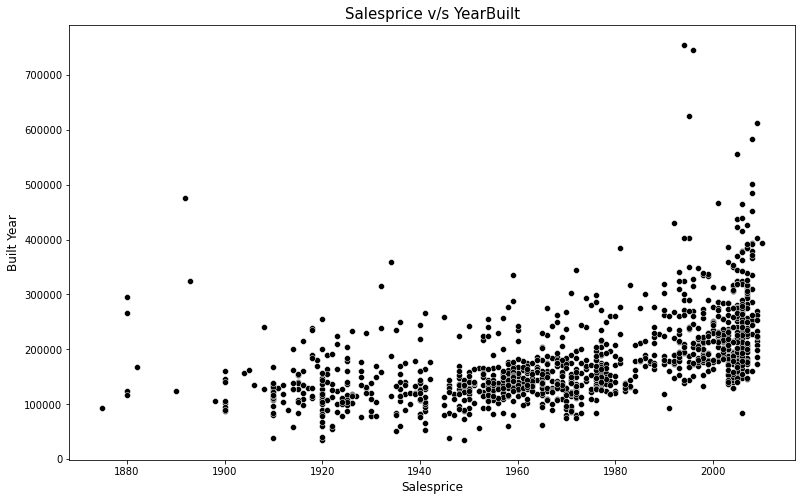

In [69]:


#average SalePrice in Every Built Year.
plt.figure(figsize=(13,8))
sns.scatterplot(df_train["YearBuilt"],df_train["SalePrice"],color='black')
plt.title("Salesprice v/s YearBuilt",fontsize=15)
plt.xlabel("Salesprice",fontsize=12)
plt.ylabel("Built Year", fontsize=12)

Above graph shows that houses which are newly built have higher salesprice.

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

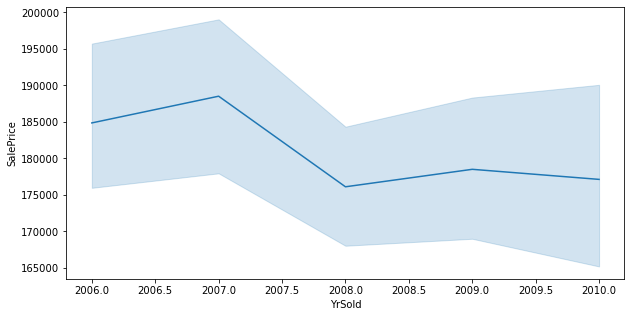

In [70]:
# Sale Price vs year.
plt.figure(figsize=(10,5))
sns.lineplot(df_train["YrSold"],df_train["SalePrice"])

Salesprice was high in 2007 but overall if weobserve, we find that the salesprice is decrease after 2007.

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

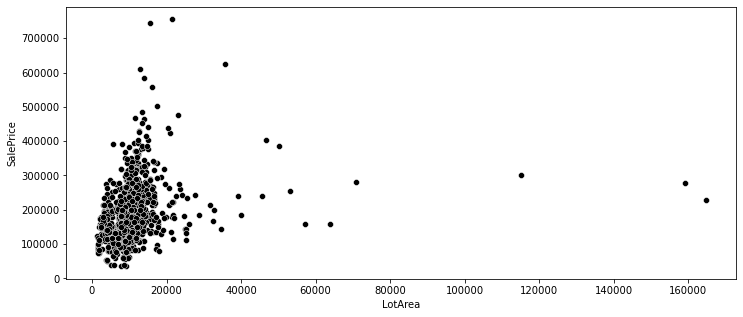

In [71]:
#LotArea v/s Salesprice
plt.figure(figsize=(12,5))
sns.scatterplot(df_train["LotArea"],df_train["SalePrice"],color='black')

Most of the data is lining between 0 to 40000, LotArea doesnt really affet the salesprice.
So, salesprice could be higher or lower, even the LotArea is less or high

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

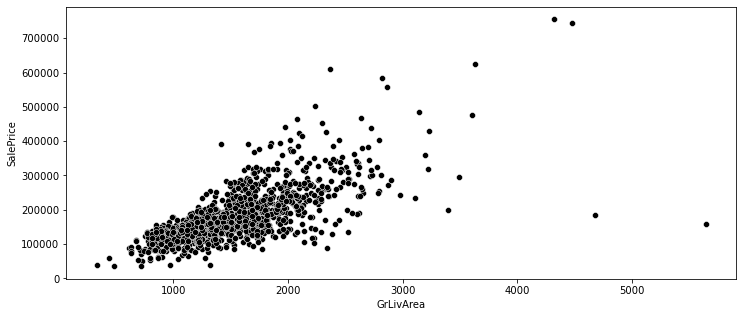

In [72]:
plt.figure(figsize=(12,5))
sns.scatterplot(df_train["GrLivArea"],df_train["SalePrice"],color='black')

We can observe that as soon as the GrLivArea is increase, we are observing that there is increment in Salesprice

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

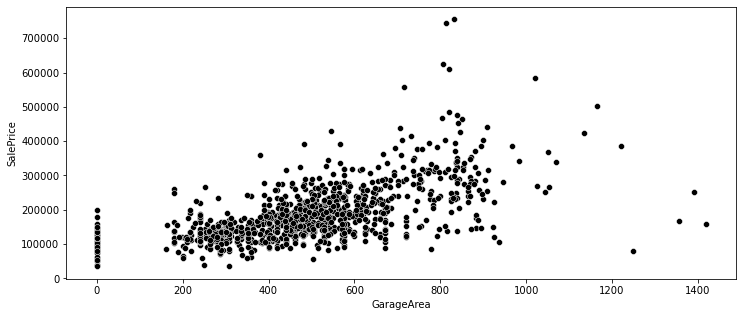

In [73]:
plt.figure(figsize=(12,5))
sns.scatterplot(df_train["GarageArea"],df_train["SalePrice"],color='black')

The above graph is showing that houses having the garage are is effecting the salesprice but the difference is not that huge.
The houses which doesnt have the garagearea has the salesprice almost close to the house having the GarageArea.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

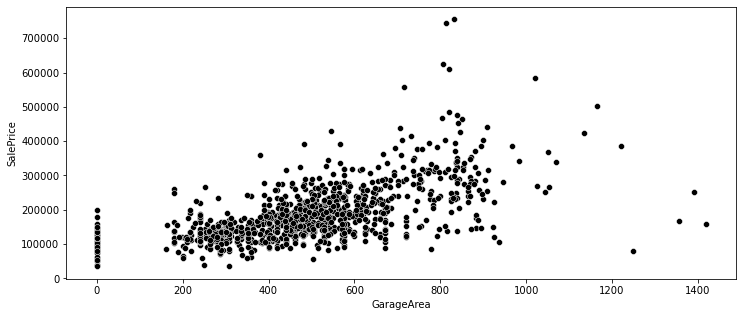

In [74]:
plt.figure(figsize=(12,5))
sns.scatterplot(df_train["GarageArea"],df_train["SalePrice"],color='black')

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

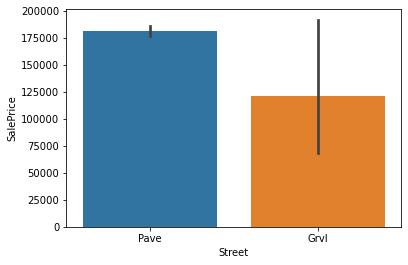

In [75]:
sns.barplot(df_train["Street"],df_train["SalePrice"])

Most of the records are of Paved one as compared to Garvel category.

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

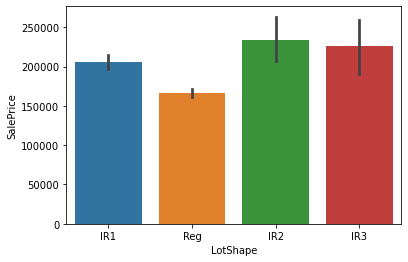

In [76]:
sns.barplot(df_train["LotShape"],df_train["SalePrice"])

Slighlty Regulary caregory has the highest salesprice as comapred to others.

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

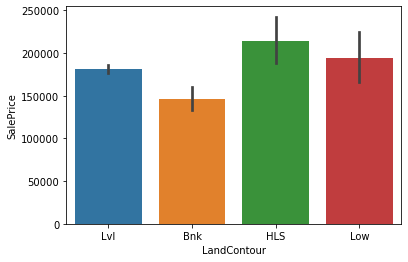

In [77]:
sns.barplot(df_train["LandContour"],df_train["SalePrice"])

Level category has the highest salesprice as comapred to other category

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

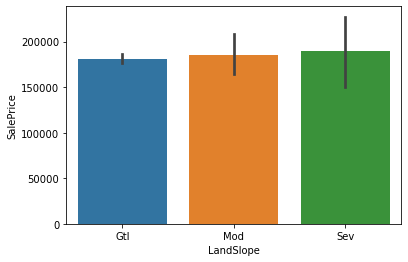

In [78]:
sns.barplot(df_train["LandSlope"],df_train["SalePrice"])

with gentle slope, the salesprice is low.

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

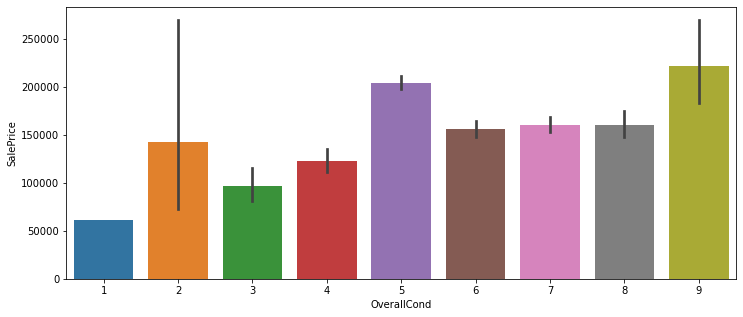

In [79]:
plt.figure(figsize=(12,5))
sns.barplot(df_train["OverallCond"],df_train["SalePrice"])

In [80]:
#dropiing the column having more than 90% the NAN values
df_train=df_train.drop(["Alley","PoolQC","MiscFeature","GarageYrBlt"],axis=1)

In [81]:
df_train=df_train.drop(["Id"],axis=1)

In [82]:
con_col=df_train.select_dtypes(include=["float64","int64"])
print(con_col.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [83]:
cat_col=df_train.select_dtypes(include=["object"])
print(cat_col.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


In [84]:
#filling the NAN value 

df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

In [85]:
#checking the columns having null values again after treating the columns having nan values
nan_cols=[i for i in df_train.columns if df_train[i].isnull().any()]
df_train[nan_cols].isnull().sum()

Fence    931
dtype: int64

In [86]:
#filling the nan values in Fence column with "Not available" as most of the house generally dont have fences
df_train["Fence"]=df_train["Fence"].fillna("Not available")

In [87]:
df_train["Fence"].value_counts()

Not available    931
MnPrv            129
GdPrv             51
GdWo              47
MnWw              10
Name: Fence, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df_train[i]=le.fit_transform(df_train[i])

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1,2,440,4,4,2,0,205,0,0,0,0,4,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,2,2,621,4,4,2,81,207,0,0,224,0,4,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,2,2,455,4,4,2,180,130,0,0,0,0,4,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1,2,546,4,4,2,0,122,0,0,0,0,2,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,0,2,529,4,4,2,240,0,0,0,0,0,4,0,6,2009,8,4,215000


# Outliers detection and removal

In [89]:
#function for detecting Outliers when columns has skewness by IQR*1.5

def IQR1(dataframe,col):
    IQR=dataframe[col].quantile(0.75)-dataframe[col].quantile(0.25)
    low_brid=dataframe[col].quantile(0.25)-(IQR*1.5)
    upp_brid=dataframe[col].quantile(0.75)+(IQR*1.5)
    return (low_brid,upp_brid)

In [90]:
#function for detecting Outliers when columns has skewness by IQR*3

def IQR3(dataframe,col):
    IQR=dataframe[col].quantile(0.75)-dataframe[col].quantile(0.25)
    low_brid=dataframe[col].quantile(0.25)-(IQR*3)
    upp_brid=dataframe[col].quantile(0.75)+(IQR*3)
    return (low_brid,upp_brid)

#### LotFrontage column

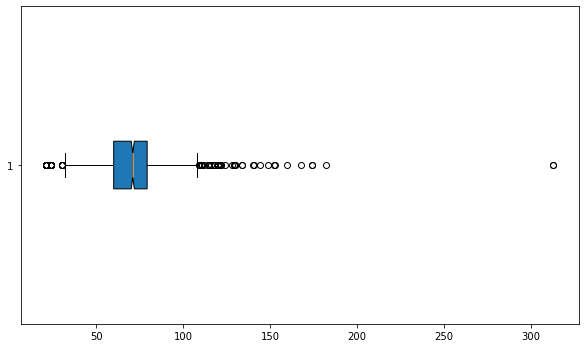

In [91]:
#Checking the outliers for LotFrontage and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["LotFrontage"],patch_artist = True,notch='True',vert=0)
plt.subplots_adjust(bottom=0.25)
plt.show()

In [92]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"LotFrontage")


(2.25, 137.0)

In [93]:
## Values more than 137.0 are outliers
df_train.loc[df_train["LotFrontage"]>=137.0,"LotFrontage"] = 137.0

##### LotArea Column

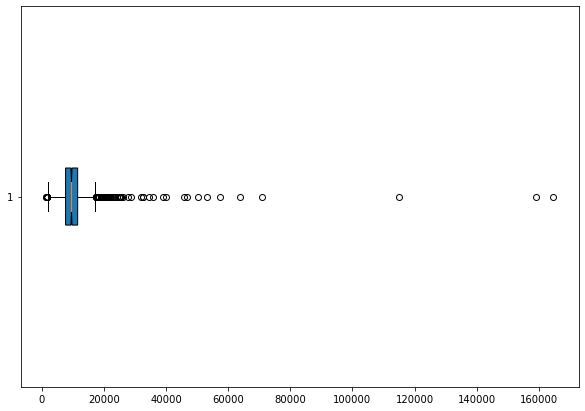

In [94]:
#Checking the outliers for LotFrontage and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["LotArea"],patch_artist = True,notch='True',vert=0)
plt.show()

In [95]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"LotArea")

(-4060.5, 23197.5)

In [96]:
## Values more than 23197.5 are outliers
df_train.loc[df_train["LotArea"]>=23197.5,"LotArea"] = 23197.5

#### MasVnrArea column

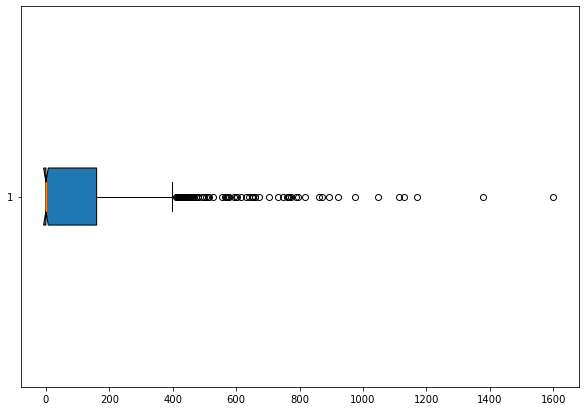

In [97]:
#Checking the outliers for LotFrontage and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["MasVnrArea"],patch_artist = True,notch='True',vert=0)
plt.show()

In [98]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"MasVnrArea")

(-480.0, 640.0)

In [99]:
## Values more than 640.0 are outliers
df_train.loc[df_train["MasVnrArea"]>=640.0,"MasVnrArea"] = 640.0

#### 1stFlrSF column

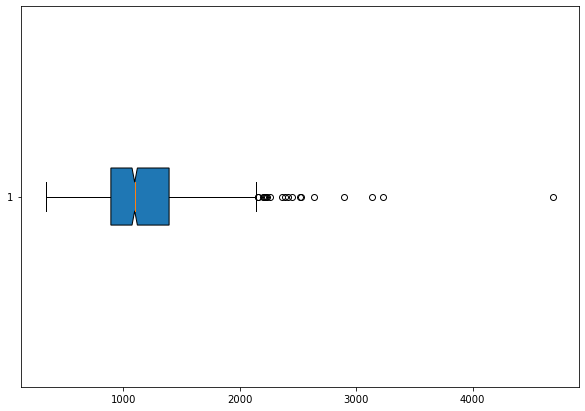

In [100]:
#Checking the outliers for LotFrontage and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["1stFlrSF"],patch_artist = True,notch='True',vert=0)
plt.show()

In [101]:
#Removing the outliers which are outside of the whiskers

IQR1(df_train,"1stFlrSF")

(142.0, 2142.0)

In [102]:
## Values more than 2142.0 are outliers
df_train.loc[df_train["1stFlrSF"]>=62142.0,"1stFlrSF"] = 2142.0


#### 2ndFlrSF column

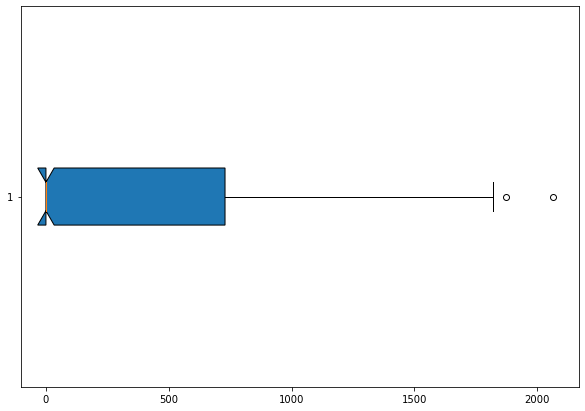

In [103]:
#Checking the outliers for 2ndFlrSF and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["2ndFlrSF"],patch_artist = True,notch='True',vert=0)
plt.show()

There are 2 outliers present but can be ignored as they are very near to whiskers.

#### GrLivArea column

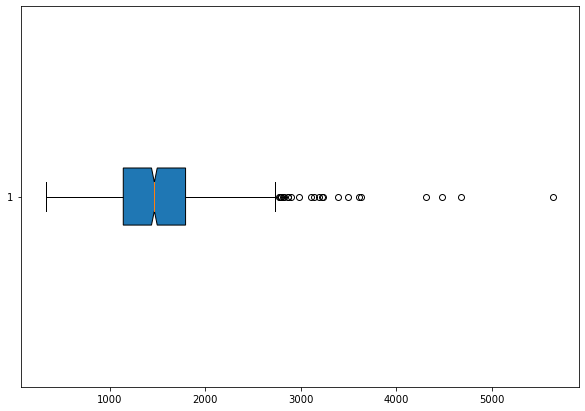

In [104]:
#Checking the outliers for GrLivArea and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["GrLivArea"],patch_artist = True,notch='True',vert=0)
plt.show()

In [105]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"GrLivArea")

(-812.0, 3750.25)

In [106]:
## Values more than 3750.25 are outliers
df_train.loc[df_train["GrLivArea"]>=62142.0,"GrLivArea"] = 62142.0


#### GarageArea column

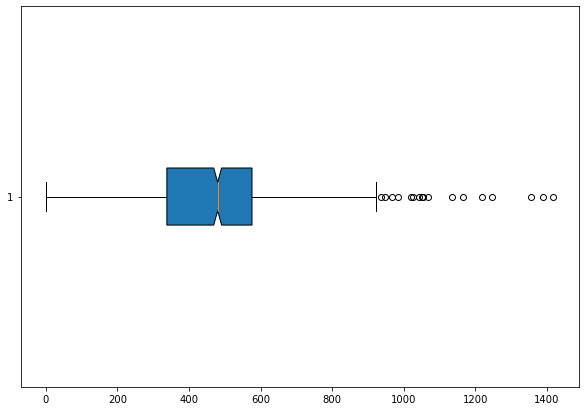

In [107]:
#Checking the outliers for GarageArea and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["GarageArea"],patch_artist = True,notch='True',vert=0)
plt.show()

In [108]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"GarageArea")

(-376.0, 1290.0)

In [109]:
## Values more than 1290.0 are outliers
df_train.loc[df_train["GarageArea"]>=1290.0,"GarageArea"] =1290.0

#### WoodDeckSF column

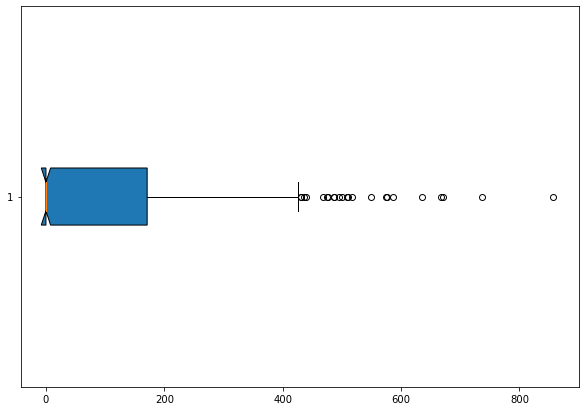

In [110]:
#Checking the outliers for WoodDeckSF and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["WoodDeckSF"],patch_artist = True,notch='True',vert=0)
plt.show()

In [111]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"WoodDeckSF")

(-513.0, 684.0)

In [112]:
## Values more than 684.0 are outliers
df_train.loc[df_train["WoodDeckSF"]>=684.0,"WoodDeckSF"] =684.0

#### OpenPorchSF column

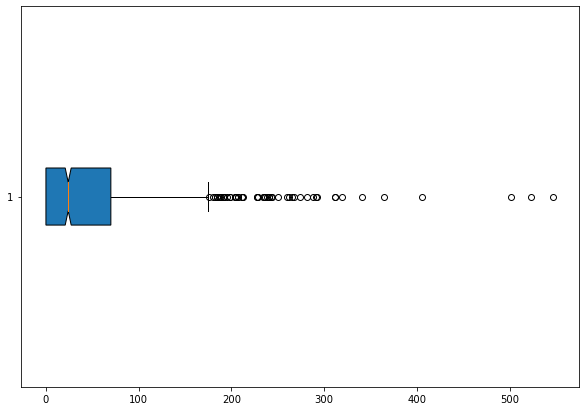

In [113]:
#Checking the outliers for OpenPorchSF and removing it 
plt.figure(figsize =(10, 7))
plt.boxplot(df_train["OpenPorchSF"],patch_artist = True,notch='True',vert=0)
plt.show()

In [114]:
#Removing the extreme outliers only in order to prevent the high amount of data loss

IQR3(df_train,"OpenPorchSF")

(-210.0, 280.0)

In [115]:
## Values more than 280.0 are outliers
df_train.loc[df_train["OpenPorchSF"]>=280.0,"OpenPorchSF"] =280.0

In [116]:
#checking the skewness

df_train.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       0.457901
LotArea           0.966841
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        1.835781
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

In [117]:
#Applying the tranformation function to remove skewness
from sklearn.preprocessing import power_transform
df_train_new=power_transform(df_train)
df_train_new=pd.DataFrame(df_train_new,columns=df_train.columns)

In [118]:
df_train=df_train_new

In [119]:
## scaling the train dataset

from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaledata=scaling.fit_transform(df_train)

In [120]:
df_train_scaled=pd.DataFrame(scaledata,columns=df_train.columns)
df_train_scaled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.370435,-0.162456,0.057550,-1.306699,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,0.198357,0.053284,0.0038,2.310950,-0.463401,-0.052799,-0.496528,0.026859,-0.613054,-0.388056,-0.088315,-0.326182,-0.209982,0.383932,-0.813065,0.778521,0.377961,-0.558722,-0.606202,0.300945,0.673258,-1.619575,-0.112649,0.360988,-0.363019,0.903777,0.099335,-0.092972,1.231264,0.267506,0.302595,-0.458345,-0.871745,-0.14173,-1.236502,-0.837006,-0.238775,0.80229,-0.782707,-1.083459,-0.169259,0.944965,-0.984125,0.276573,0.777879,1.673239,-0.673804,-0.376496,0.259753,-0.114406,0.220168,0.195505,0.300947,-0.959799,1.418017,-0.411301,-0.138554,-0.297551,-0.077648,0.503226,-0.193133,-1.719437,-0.604825,0.409069,0.029735,-0.671353
1,-1.167999,-0.162456,1.243968,1.400449,0.058621,-1.366794,0.341434,0.0,0.617281,4.188040,0.037086,0.053284,0.0038,-0.436548,-0.463401,1.345826,0.407009,-0.185817,-0.854247,-5.058580,5.396201,1.159356,1.119374,0.383932,-0.813065,-1.124906,-2.646123,0.852373,0.982931,-3.324610,-1.419429,-1.619575,0.394677,-2.532187,2.756067,1.027313,2.374300,-0.092972,-0.968376,0.267506,0.302595,2.122554,-0.871745,-0.14173,1.295050,1.176812,-0.238775,0.80229,-0.782707,1.356214,-0.169259,-0.687929,0.943901,0.276573,0.777879,1.673239,-0.673804,0.972281,0.259753,0.682046,0.220168,0.195505,0.300947,0.782072,1.422582,-0.411301,-0.138554,3.360787,-0.077648,0.503226,-0.193133,1.320612,-0.604825,0.409069,0.029735,1.181174
2,0.490047,-0.162456,1.099831,0.106592,0.058621,-1.366794,0.341434,0.0,-1.482445,-0.238775,0.512775,0.053284,0.0038,-0.436548,1.021519,0.656375,-0.496528,0.836680,0.495717,-0.388056,-0.088315,-0.646692,-0.781046,0.383932,-0.813065,-1.124906,0.377961,0.852373,-0.606202,0.300945,-1.754271,-0.368766,0.925416,0.360988,-0.363019,-0.504500,0.185571,-0.092972,-0.968376,0.267506,0.302595,0.058641,1.176207,-0.14173,1.003880,1.176812,-0.238775,0.80229,1.268421,0.151784,-0.169259,0.944965,0.943901,0.276573,0.777879,1.673239,-0.673804,0.972281,0.259753,-0.046417,0.220168,0.195505,0.300947,1.044184,1.204417,-0.411301,-0.138554,-0.297551,-0.077648,0.503226,-0.193133,-0.076750,-0.604825,0.409069,0.029735,1.197587
3,-1.167999,-0.162456,1.717189,0.536225,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,0.356843,0.053284,0.0038,-0.436548,-0.463401,-0.052799,0.407009,0.063582,-0.569998,1.737139,-0.088315,-0.326182,-0.209982,-1.237353,1.392791,0.778521,0.377961,-0.558722,-0.606202,0.300945,0.673258,-0.954307,0.797133,0.360988,-0.363019,1.160517,1.674462,-0.092972,-0.968376,0.267506,0.302595,1.574554,-0.871745,-0.14173,0.739356,-0.837006,-0.238775,0.80229,-0.782707,0.151784,-0.169259,0.944965,0.375729,0.276573,0.777879,1.673239,-0.673804,-0.376496,0.259753,0.357929,0.220168,0.195505,0.300947,-0.959799,1.174727,-0.411301,-0.138554,-0.297551,-0.077648,-1.935972,-0.193133,-2.209015,1.649742,-2.769993,0.029735,0.326442
4,-1.167999,-0.162456,0.057550,1.550074,0.058621,-1.366794,0.341434,0.0,-1.025661,-0.238775,0.356843,0.053284,0.0038,-0.436548,-0.463401,-0.052799,1.234321,0.063582,0.694762,-0.388056,-0.088315,-1.468844,-1.500720,2.080260,1.157906,-1.124906,0.377961,-0.558722,-0.606202,0.300945,0.673258,-1.619575,1.176115,0.360988,-0.363019,-0.226633,1.2

In [121]:
df_train=df_train_scaled

# Split Train and Test Datasets

In [123]:
x=df_train.drop("SalePrice",axis=1)
y=df_train["SalePrice"]

# ML Model Building

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [126]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Score : ",lr.score(x_train,y_train))
predlr=lr.predict(x_test)
print("R2 score : ",r2_score(y_test,predlr))

Score :  0.9187774131638755
R2 score :  0.7563469570713391


In [127]:
print("MAE:",mean_absolute_error(y_test,predlr))
print("MSE:",mean_squared_error(y_test,predlr))
print("RMSE:",sqrt(mean_squared_error(y_test,predlr)))

MAE: 0.24217867017421776
MSE: 0.21740108636594974
RMSE: 0.4662628940479284


### Ridge

In [128]:
rg=Ridge()
rg.fit(x_train,y_train)
print("Score : ",rg.score(x_train,y_train))
predrg=rg.predict(x_test)
print("R2 score : ",r2_score(y_test,predrg))

Score :  0.9188048351572321
R2 score :  0.756533238490787


In [129]:
print("MAE:",mean_absolute_error(y_test,predrg))
print("MSE:",mean_squared_error(y_test,predrg))
print("RMSE:",sqrt(mean_squared_error(y_test,predrg)))

MAE: 0.24193189111345514
MSE: 0.21723487550122592
RMSE: 0.46608462268264755


In [130]:
#Apply Randomized Searchcv on Ridge model.

parameters={"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}
rdm_rg=RandomizedSearchCV(rg,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rdm_rg.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [131]:
print(rdm_rg.best_estimator_)
print(rdm_rg.best_params_)

Ridge(alpha=150)
{'alpha': 150}


In [132]:
rdm_rg.best_score_

0.8964394940630898

In [133]:
# prediction on the test data
rdm_predrg=rdm_rg.predict(x_test)
r2_score(y_test,rdm_predrg)

0.78799325378594

In [134]:
print("MAE:",mean_absolute_error(y_test,rdm_predrg))
print("MSE:",mean_squared_error(y_test,rdm_predrg))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_predrg)))

MAE: 0.24048460232154062
MSE: 0.18916446267138012
RMSE: 0.43493041129746274


### Gradient Boosting Regressor

In [135]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
print("Score : ",gb.score(x_train,y_train))
predgb=gb.predict(x_test)
print("R2 score : ",r2_score(y_test,predgb))

Score :  0.9687805407822732
R2 score :  0.8093530603051882


In [136]:
print("MAE:",mean_absolute_error(y_test,predgb))
print("MSE:",mean_squared_error(y_test,predgb))
print("RMSE:",sqrt(mean_squared_error(y_test,predgb)))

MAE: 0.239782322769902
MSE: 0.1701060298850075
RMSE: 0.4124391226411572


In [137]:
#Apply Randomized Searchcv on GB model.

parameters={"n_estimators":[50,100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb=RandomizedSearchCV(gb,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)
rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  7.9min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20, 22],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [138]:
rdm_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features='sqrt',
                          min_samples_leaf=7, n_estimators=800)

In [139]:
rdm_gb.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 7,
 'learning_rate': 0.01}

In [140]:
rdm_gb.best_score_

0.8986843609460685

In [141]:
# prediction on the test data
rdm_predgb=rdm_gb.predict(x_test)
r2_score(y_test,rdm_predgb)

0.8407186793152654

In [142]:
print("MAE:",mean_absolute_error(y_test,rdm_predgb))
print("MSE:",mean_squared_error(y_test,rdm_predgb))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_predgb)))

MAE: 0.21687708985892215
MSE: 0.14211984278317927
RMSE: 0.37698785495447895


# Decision Tree Regressor

In [143]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("Score : ",dtr.score(x_train,y_train))
preddtr=dtr.predict(x_test)
print("R2 score : ",r2_score(y_test,preddtr))

Score :  1.0
R2 score :  0.6531145204793447


In [144]:
print("MAE:",mean_absolute_error(y_test,preddtr))
print("MSE:",mean_squared_error(y_test,preddtr))
print("RMSE:",sqrt(mean_squared_error(y_test,preddtr)))

MAE: 0.38315478867101976
MSE: 0.30951093073130276
RMSE: 0.5563370657535796


In [145]:
#Apply Randomized Searchcv on DecisionTree model.

parameters={"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dtr=RandomizedSearchCV(dtr,param_distributions=parameters,n_iter=40,n_jobs=-1,cv=10,verbose=2)
rdm_dtr.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [146]:
rdm_dtr.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=25, max_features='auto',
                      min_samples_leaf=6, min_samples_split=18)

In [147]:
rdm_dtr.best_params_

{'min_samples_split': 18,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'mae'}

In [148]:
rdm_dtr.best_score_

0.773053279710731

In [149]:
# prediction on the test data
rdm_preddtr=rdm_dtr.predict(x_test)
r2_score(y_test,rdm_preddtr)

0.717364368645786

In [150]:
print("MAE:",mean_absolute_error(y_test,rdm_preddtr))
print("MSE:",mean_squared_error(y_test,rdm_preddtr))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_preddtr)))

MAE: 0.358835411818829
MSE: 0.2521835662857811
RMSE: 0.5021788190334008


### RandomForest Regressor

In [151]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print("Score : ",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("R2 score : ",r2_score(y_test,predrf))

Score :  0.981516588468745
R2 score :  0.8068961053727197


In [152]:
print("MAE:",mean_absolute_error(y_test,predrf))
print("MSE:",mean_squared_error(y_test,predrf))
print("RMSE:",sqrt(mean_squared_error(y_test,predrf)))

MAE: 0.2600221429113661
MSE: 0.1722982646506829
RMSE: 0.41508826127786713


In [153]:
#Apply Randomized Searchcv on Random Forest model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

rdm_rf=RandomizedSearchCV(rf,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)
rdm_rf.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.5min finished


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [154]:
rdm_rf.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=500)

In [155]:
rdm_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [156]:
rdm_rf.best_score_

0.8596920754042956

In [157]:
# prediction on the test data
rdm_predrf=rdm_rf.predict(x_test)
r2_score(y_test,rdm_predrf)

0.8188719264570152

In [158]:
print("MAE:",mean_absolute_error(y_test,rdm_predrf))
print("MSE:",mean_squared_error(y_test,rdm_predrf))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_predrf)))

MAE: 0.25678911853765984
MSE: 0.161612756755703
RMSE: 0.4020108913396539


### XGBoost Regressor

In [159]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
print("Score : ",xg.score(x_train,y_train))
predxg=xg.predict(x_test)
print("R2 score : ",r2_score(y_test,predxg))

Score :  0.9999616444867505
R2 score :  0.7824905533385644


In [160]:
print("MAE:",mean_absolute_error(y_test,predxg))
print("MSE:",mean_squared_error(y_test,predxg))
print("RMSE:",sqrt(mean_squared_error(y_test,predxg)))

MAE: 0.2694226816093911
MSE: 0.1940742846084536
RMSE: 0.44053863009780836


In [161]:
# Apply RandomizedSearchCV with XGBoost
parameters={"n_estimators":[100,200,300,400,500,600,700,800],"learning_rate":[0.001,0.01,0.1,0.3,0.5,0.7],
              "max_depth":[3,5,7,10,12,15],"gamma":[0.001,0.01,0.1,1,10],"reg_alpha":[0,0.1,0.5,0.7,1],
              "reg_lambda":[1,10,50,80,100,120,150]}

rdm_xg=RandomizedSearchCV(xg,param_distributions=parameters,n_jobs=-1,n_iter=50,cv=10,verbose=5)
rdm_xg.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.0min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_pa...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [162]:
rdm_xg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=80, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
rdm_xg.best_params_

{'reg_lambda': 80,
 'reg_alpha': 0,
 'n_estimators': 700,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.001}

In [164]:
rdm_xg.best_score_

0.8887955390220318

In [165]:
# prediction on the test data
rdm_predxg=rdm_xg.predict(x_test)
r2_score(y_test,rdm_predxg)

0.823362537353223

In [166]:
print("MAE:",mean_absolute_error(y_test,rdm_predxg))
print("MSE:",mean_squared_error(y_test,rdm_predxg))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_predxg)))

MAE: 0.2483930185701984
MSE: 0.15760597861105993
RMSE: 0.3969961947060197


# Conclusion

XGBoost Regressor is giving the best accuracy score


In [191]:
#Saving our model
import joblib
joblib.dump(rdm_predxg,'House_price_prediction_final1.obj')

['House_price_prediction_final1.obj']

# Loading the Test data

In [167]:
df_test=pd.read_csv("test-housing.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [168]:
#Shape of the data
df_test.shape

(292, 80)

<AxesSubplot:>

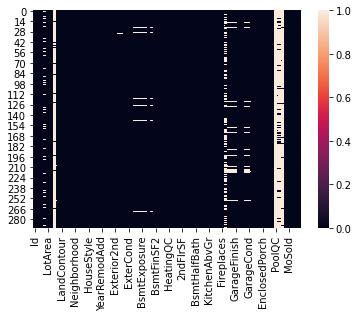

In [169]:
#chking the nulll values in the test data
sns.heatmap(df_test.isnull())

In [170]:
#checking the columns having null values in test data
nan_cols_test=[i for i in df_test.columns if df_test[i].isnull().any()]
df_test[nan_cols_test].isnull().sum()

LotFrontage      45
Alley           278
MasVnrType        1
MasVnrArea        1
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinType2      7
Electrical        1
FireplaceQu     139
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          292
Fence           248
MiscFeature     282
dtype: int64

In [171]:
# Percentage of null values in each columns having NAN
print((df_test[nan_cols_test].isnull().mean())*100)

LotFrontage      15.410959
Alley            95.205479
MasVnrType        0.342466
MasVnrArea        0.342466
BsmtQual          2.397260
BsmtCond          2.397260
BsmtExposure      2.397260
BsmtFinType1      2.397260
BsmtFinType2      2.397260
Electrical        0.342466
FireplaceQu      47.602740
GarageType        5.821918
GarageYrBlt       5.821918
GarageFinish      5.821918
GarageQual        5.821918
GarageCond        5.821918
PoolQC          100.000000
Fence            84.931507
MiscFeature      96.575342
dtype: float64


In [172]:
#dropiing the columns dropped in train dataset
df_test=df_test.drop(["Alley","PoolQC","MiscFeature","Id","GarageYrBlt"],axis=1)

In [173]:
#filling the NAN value 

df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

In [174]:
df_test["Fence"]=df_test["Fence"].fillna("Not available")

In [175]:
#checking the columns having null values in test data
nan_cols_test=[i for i in df_test.columns if df_test[i].isnull().any()]
df_test[nan_cols_test].isnull().sum()

Series([], dtype: float64)

In [176]:
con_col_test=df_test.select_dtypes(include=["float64","int64"])
print(con_col_test.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [177]:
cat_col_test=df_test.select_dtypes(include=["object"])
print(cat_col_test.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


In [178]:
le = LabelEncoder()
for i in cat_col_test:
    df_test[i]=le.fit_transform(df_test[i])

df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,0,3,676,4,4,2,178,51,0,0,0,0,4,0,7,2007,5,2
1,120,2,66.425101,5814,1,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1,2,565,4,4,2,63,0,0,0,0,0,4,0,8,2009,0,0
2,20,2,66.425101,11838,1,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,1,2,522,4,4,2,202,151,0,0,0,0,4,0,6,2009,5,2
3,70,2,75.000000,12000,1,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,2,1,234,4,4,2,0,0,0,0,0,0,4,0,7,2009,5,2
4,60,2,86.000000,14598,1,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,0,3,668,4,4,2,100,18,0,0,0,0,4,0,1,2008,5,2


In [188]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaledata=scaling.fit_transform(df_test)

In [189]:
df_test_scaled=pd.DataFrame(scaledata,columns=df_test.columns)
df_test_scaled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.856054,-0.287006,0.981605,0.263894,0.083045,-1.402669,-2.566101,-0.058621,-2.001106,-0.226274,1.554460,-0.028763,-0.058621,-0.444642,-0.518671,2.157766,-0.464603,1.065430,1.031595,1.846195,-0.078757,0.694397,0.733065,1.952161,0.522510,-0.857858,0.326787,0.776109,-2.549340,0.219,-1.192678,-0.377559,1.888202,0.296045,-0.303257,0.281925,2.074477,-0.141879,-0.880154,0.248633,0.312609,2.152007,-0.801927,-0.097029,0.866809,1.132656,-0.263813,0.776457,-0.727992,0.254952,-0.217895,-0.469314,0.917136,0.22482,0.651586,-0.429570,-0.659455,-1.474589,1.687009,1.038573,0.216962,0.181711,0.281378,0.752755,0.059897,-0.341845,-0.082453,-0.258624,0.0,0.39727,-0.126021,0.276960,-0.650908,0.23029,0.148654
1,1.431981,-0.287006,0.000000,-0.363030,0.083045,-1.402669,0.299297,-0.058621,-1.351136,-0.226274,1.554460,-0.028763,-0.058621,2.722077,-0.518671,1.419117,-0.464603,0.374523,-0.064496,-0.523427,-0.078757,-1.046066,-1.248926,0.355435,-0.623319,-0.857858,0.326787,-0.518884,-0.303768,0.219,-2.090260,-0.377559,1.391494,0.296045,-0.303257,-0.909772,0.418166,-0.141879,0.645098,0.248633,0.312609,0.617800,-0.801927,-0.097029,-0.228029,1.132656,-0.263813,-1.051974,-0.727992,-2.226584,-0.217895,-0.469314,-1.401511,0.22482,0.651586,-2.710193,-0.659455,-0.254816,0.359228,0.511068,0.216962,0.181711,0.281378,-0.192269,-0.715738,-0.341845,-0.082453,-0.258624,0.0,0.39727,-0.126021,0.637997,0.863555,-6.49418,-3.323909
2,-0.856054,-0.287006,0.000000,0.089636,0.083045,0.745474,0.299297,-0.058621,0.598774,-0.226274,-1.281387,-0.028763,-0.058621,-0.444642,-0.518671,1.419117,-0.464603,0.933828,0.782483,1.846195,-0.078757,0.694397,0.733065,0.355435,-0.623319,-0.857858,0.326787,0.776109,-0.303768,0.219,-2.090260,1.284459,-1.024418,0.296045,-0.303257,2.913893,1.675735,-0.141879,-0.880154,0.248633,0.312609,1.786200,-0.801927,-0.097029,0.605762,-0.836008,-0.263813,0.776457,-0.727992,0.254952,-0.217895,-2.916451,0.337474,0.22482,0.651586,1.851054,-0.659455,-0.254816,0.359228,0.306719,0.216962,0.181711,0.281378,0.949978,1.580750,-0.341845,-0.082453,-0.258624,0.0,0.39727,-0.126021,-0.084077,0.863555,0.23029,0.148654
3,0.287963,-0.287006,0.429998,0.101809,0.083045,0.745474,-3.998799,-0.058621,0.598774,-0.226274,-1.114572,-0.028763,-0.058621,-0.444642,1.011146,0.680468,1.419621,-1.040191,-1.758454,-0.523427,-0.078757,-0.610950,-0.588262,0.355435,-0.623319,0.633181,0.326787,-0.518884,0.819019,0.219,0.602487,0.730453,-0.383129,0.296045,-0.303257,-0.312705,-0.799293,-0.141879,-0.880154,0.248633,0.312609,-0.747153,0.860208,-0.097029,0.169385,-0.836008,-0.263813,-1.051974,1.296518,0.254952,-0.217895,-1.692883,0.337474,0.22482,0.651586,-0.429570,-0.659455,0.964957,-0.968552,-1.061944,0.216962,0.181711,0.281378,-0.709979,-0.715738,-0.341845,-0.082453,-0.258624,0.0,0.39727,-0.126021,0.276960,0.863555,0.23029,0.148654
4,0.059160,-0.287006,0.981605,0.297033,0.083045,-1.402669,0.299297,-0.058621,-1.351136,-0.226274,1.387645,-1.228602,-0.058621,-0.444642,1.011146,-0.058181,-0.464603,1.131230,1.081417,-0.523427,-0.078757,0.694397,0.733065,1.952161,-0.199362,-0.857858,0.326787,0.776109,-0.303768,0.219,-0.295096,1.284459,-1.024418,0.296045,-0.303257,0.820504,-0.351004,-0.141879,-0.880154,0.248633

In [190]:
df_test=df_test_scaled

In [192]:
prediction=rdm_xg.predict(df_test)